In [43]:
import os
import pandas as pd

In [44]:
ROOT_DIR = os.path.realpath(os.path.join(os.getcwd(), '..'))
cln_pkl_loc = os.path.join(ROOT_DIR, 'data_cleaning','cleanweathersmall.pkl')

In [45]:
df = pd.read_pickle(cln_pkl_loc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765246 entries, 0 to 3765245
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   station  object        
 1   time     datetime64[ns]
 2   temp     float64       
 3   dwpt     float64       
 4   rhum     float64       
 5   prcp     float64       
 6   wdir     float64       
 7   wspd     float64       
 8   pres     float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 258.5+ MB


In [46]:
pivoted_df = df.pivot(index='time', columns='station', values=['temp', 'dwpt','rhum','prcp','wdir','wspd','pres'])
pivoted_df.columns = ['_'.join(col) for col in pivoted_df.columns.values]
pivoted_df

,temp_0CNUO,temp_0CO7B,temp_0FV1F,temp_1J1PJ,temp_1JWST,temp_20QWH,temp_21O3U,temp_2W8UZ,temp_3S56J,temp_4DUJO,...,pres_W5F5F,pres_X9FED,pres_XM44W,pres_Y59TE,pres_Z7ZOG,pres_ZFZUV,pres_ZNWZW,pres_ZUQJS,pres_ZWC6W,pres_ZYITU
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,-25.10,5.00,1.20,-0.90,-6.50,-28.70,-29.00,4.60,-26.50,1.80,...,NaN,NaN,1013.50,NaN,NaN,1023.80,NaN,NaN,1010.80,NaN
2022-01-01 01:00:00,-25.70,5.10,0.90,-0.60,-7.50,-29.50,-28.90,4.60,-27.30,1.60,...,NaN,NaN,1014.60,NaN,NaN,1024.20,NaN,NaN,1011.80,NaN
2022-01-01 02:00:00,-26.20,4.20,1.50,-0.80,-8.60,-30.20,-30.10,4.70,-27.90,0.90,...,NaN,NaN,1015.10,NaN,NaN,1024.90,NaN,NaN,1012.70,NaN
2022-01-01 03:00:00,-26.10,5.50,4.10,-0.90,-9.40,-29.90,-30.10,4.60,-28.10,1.00,...,NaN,NaN,1016.00,NaN,NaN,1025.40,NaN,NaN,1013.60,NaN
2022-01-01 04:00:00,-26.50,5.90,3.10,-1.20,-10.10,-30.40,-31.40,4.90,-28.60,0.50,...,NaN,NaN,1017.30,NaN,NaN,1025.40,NaN,NaN,1013.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-22 19:00:00,12.40,17.80,13.70,11.50,10.20,13.50,12.50,15.20,10.80,12.40,...,1022.10,1025.20,1022.60,1025.00,1025.30,1024.50,1025.40,1022.60,1017.80,1016.70
2022-09-22 20:00:00,13.00,17.00,14.30,12.00,10.40,14.00,12.50,14.80,11.40,11.60,...,1020.30,1024.40,1022.40,1024.00,1024.00,1023.10,1025.00,1022.20,1017.90,1016.00
2022-09-22 21:00:00,13.20,16.60,13.90,12.40,10.50,14.30,12.40,15.10,11.70,10.80,...,1019.60,1024.20,1022.20,1023.00,1023.70,1022.00,1024.00,1022.40,1018.10,1017.40


### Our target is Ann Arbor which is station KARB0. This simple model will just try to predict the temperature for KARB0. So will build some features specifically around it.

In [47]:
ann_arbor_cols = [col for col in pivoted_df.columns if "KARB0" in col]
ann_arbor_df = pivoted_df[ann_arbor_cols].copy()

#### This adds a columnn for the weather at 24-48 hrs prior to our target

In [48]:
for col in ann_arbor_df.columns:
    for i in range(-24,-3):
        ann_arbor_df[f'{i}hr~{col}'] = ann_arbor_df[col].shift(i)

In [49]:
ann_arbor_df = ann_arbor_df.rename_axis(None, axis = 0)
ann_arbor_df

,temp_KARB0,dwpt_KARB0,rhum_KARB0,prcp_KARB0,wdir_KARB0,wspd_KARB0,pres_KARB0,-24hr~temp_KARB0,-23hr~temp_KARB0,-22hr~temp_KARB0,...,-13hr~pres_KARB0,-12hr~pres_KARB0,-11hr~pres_KARB0,-10hr~pres_KARB0,-9hr~pres_KARB0,-8hr~pres_KARB0,-7hr~pres_KARB0,-6hr~pres_KARB0,-5hr~pres_KARB0,-4hr~pres_KARB0
2022-01-01 00:00:00,5.00,2.90,86.00,0.00,120.00,11.00,1005.00,-2.20,-1.10,-0.60,...,1007.70,1007.00,1005.80,1005.40,1005.60,1005.70,1004.60,1004.60,1005.30,1004.90
2022-01-01 01:00:00,5.00,2.90,86.00,0.00,120.00,11.20,1005.40,-2.80,-2.20,-1.10,...,1008.50,1007.70,1007.00,1005.80,1005.40,1005.60,1005.70,1004.60,1004.60,1005.30
2022-01-01 02:00:00,5.00,2.90,86.00,0.00,120.00,5.40,1005.30,-3.30,-2.80,-2.20,...,1009.00,1008.50,1007.70,1007.00,1005.80,1005.40,1005.60,1005.70,1004.60,1004.60
2022-01-01 03:00:00,5.00,2.90,86.00,0.00,0.00,0.00,1004.90,-3.90,-3.30,-2.80,...,1009.60,1009.00,1008.50,1007.70,1007.00,1005.80,1005.40,1005.60,1005.70,1004.60
2022-01-01 04:00:00,5.60,3.30,85.00,0.00,0.00,0.00,1004.90,-4.40,-3.90,-3.30,...,1008.90,1009.60,1009.00,1008.50,1007.70,1007.00,1005.80,1005.40,1005.60,1005.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-22 19:00:00,15.00,3.50,46.00,0.00,320.00,25.90,1017.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1019.00
2022-09-22 20:00:00,16.10,4.50,46.00,0.00,320.00,18.40,1017.90,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-22 21:00:00,16.00,4.40,46.00,0.00,330.00,22.00,1019.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-22 22:00:00,14.00,2.90,47.00,0.00,330.00,22.00,1019.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
pred_df = pd.merge(pivoted_df,ann_arbor_df, left_index=True, right_index=True)
pred_df

,temp_0CNUO,temp_0CO7B,temp_0FV1F,temp_1J1PJ,temp_1JWST,temp_20QWH,temp_21O3U,temp_2W8UZ,temp_3S56J,temp_4DUJO,...,-13hr~pres_KARB0,-12hr~pres_KARB0,-11hr~pres_KARB0,-10hr~pres_KARB0,-9hr~pres_KARB0,-8hr~pres_KARB0,-7hr~pres_KARB0,-6hr~pres_KARB0,-5hr~pres_KARB0,-4hr~pres_KARB0
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,-25.10,5.00,1.20,-0.90,-6.50,-28.70,-29.00,4.60,-26.50,1.80,...,1007.70,1007.00,1005.80,1005.40,1005.60,1005.70,1004.60,1004.60,1005.30,1004.90
2022-01-01 01:00:00,-25.70,5.10,0.90,-0.60,-7.50,-29.50,-28.90,4.60,-27.30,1.60,...,1008.50,1007.70,1007.00,1005.80,1005.40,1005.60,1005.70,1004.60,1004.60,1005.30
2022-01-01 02:00:00,-26.20,4.20,1.50,-0.80,-8.60,-30.20,-30.10,4.70,-27.90,0.90,...,1009.00,1008.50,1007.70,1007.00,1005.80,1005.40,1005.60,1005.70,1004.60,1004.60
2022-01-01 03:00:00,-26.10,5.50,4.10,-0.90,-9.40,-29.90,-30.10,4.60,-28.10,1.00,...,1009.60,1009.00,1008.50,1007.70,1007.00,1005.80,1005.40,1005.60,1005.70,1004.60
2022-01-01 04:00:00,-26.50,5.90,3.10,-1.20,-10.10,-30.40,-31.40,4.90,-28.60,0.50,...,1008.90,1009.60,1009.00,1008.50,1007.70,1007.00,1005.80,1005.40,1005.60,1005.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-22 19:00:00,12.40,17.80,13.70,11.50,10.20,13.50,12.50,15.20,10.80,12.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1019.00
2022-09-22 20:00:00,13.00,17.00,14.30,12.00,10.40,14.00,12.50,14.80,11.40,11.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-22 21:00:00,13.20,16.60,13.90,12.40,10.50,14.30,12.40,15.10,11.70,10.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
pred_df = pred_df[pred_df['-24hr~temp_KARB0'].notna()]

In [52]:
to_drop = []
for col in pred_df.columns:
    num = pred_df[col].isna().sum()
    if num > 100:
        # print(f"{col} has {num} missing values")
        to_drop.append(col)
pred_df.drop(columns=to_drop,inplace=True)
pred_df.dropna(inplace=True)
pred_df.shape

(6298, 4164)

### Now our target will be the '-24hr~temp_KARB0' column, which is the temperature 24 hrs in the future from all of the original features.

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X_cols = [col for col in pred_df.columns if "~" not in col]
X = pred_df[X_cols]
y = pred_df['-24hr~temp_KARB0']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
xt_reg = ExtraTreesRegressor(n_estimators=100, random_state=696,n_jobs=-1).fit(X_train, y_train)
lasso_reg = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
tw_reg = linear_model.TweedieRegressor().fit(X_train, y_train)
dummy_reg = DummyRegressor(strategy="mean").fit(X_train, y_train)

In [55]:
print(f"Extra Trees Regressor acc score: {xt_reg.score(X_test,y_test)}")
print(f"      Lasso Regressor acc score: {lasso_reg.score(X_test,y_test)}")
print(f"    Tweedie Regressor acc score: {tw_reg.score(X_test,y_test)}")
print(f"      Dummy Regressor acc score: {dummy_reg.score(X_test,y_test)}")

Extra Trees Regressor acc score: 0.983942836694922
      Lasso Regressor acc score: 0.9641599182818735
    Tweedie Regressor acc score: 0.9401091914542697
      Dummy Regressor acc score: -0.0001916979506044747


In [58]:
feature_importance_df = pd.DataFrame([X.columns, xt_reg.feature_importances_]).transpose()
feature_importance_df.columns = ['Feature', 'Importance']
feature_importance_df.sort_values('Importance',ascending=False,inplace=True)

In [63]:
import altair as alt
alt.Chart(feature_importance_df[:5]).mark_bar().encode(
    x=alt.X('Importance:Q', axis=alt.Axis(format="%", tickSize=0, labelFontSize=12)),
    y=alt.Y(
        'Feature:N', sort=list(feature_importance_df[:5].Feature), title="",
        axis=alt.Axis(tickSize=0, labelFontSize=12, labelPadding=10)),
).properties(
    height=200
)



alt.Chart(...)

In [64]:
from sklearn.model_selection import cross_val_score
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import numpy as np

space  = [Integer(100,150, name='n_estimators'),
          Integer(1, 5, name='max_depth'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    xt_reg.set_params(**params)

    return -np.mean(cross_val_score(xt_reg, X, y, cv=5, n_jobs=-1,
                    scoring='neg_mean_squared_error'))

In [65]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=696)

"Best score=%.4f" % res_gp.fun

'Best score=14.0587'

In [66]:
print("""Best parameters:
- n-estimators=%d
- max_depth=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2],res_gp.x[3]))

Best parameters:
- n-estimators=126
- max_depth=5
- min_samples_split=14
- min_samples_leaf=17


<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

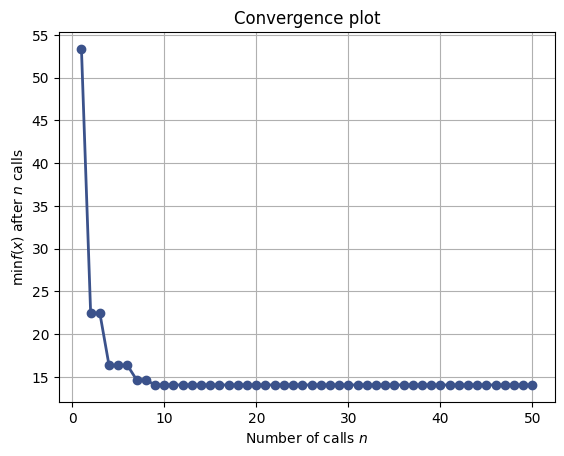

In [67]:
from skopt.plots import plot_convergence

plot_convergence(res_gp)